In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading the datasets
cab_data = pd.read_csv('Data/Cab_Data.csv')
customer_id = pd.read_csv('Data/Customer_ID.csv')
transaction_id = pd.read_csv('Data/Transaction_ID.csv')
city = pd.read_csv('Data/City.csv')

Exploring the Cab Data

In [3]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [4]:
cab_data.head(4)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602


Convert date of travel to date type

In [16]:
import datetime

In [17]:
cab_data['Date of Travel'] = pd.TimedeltaIndex(cab_data['Date of Travel'], unit = 'd') + datetime.datetime(1899, 12, 30)

In [18]:
cab_data['Date of Travel'].max()

Timestamp('2018-12-31 00:00:00')

In [19]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [20]:
# Desciptive statistics on the cab data
cab_data[['KM Travelled', 'Price Charged', 'Cost of Trip']].describe()

,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113
std,12.233526,274.378911,157.993661
min,1.900000,15.600000,19.000000
25%,12.000000,206.437500,151.200000
50%,22.440000,386.360000,282.480000
75%,32.960000,583.660000,413.683200
max,48.000000,2048.030000,691.200000


In [21]:
customer_id.head(3)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242


In [22]:
#Descriptive statistics on the customer id data
customer_id[['Age', 'Income (USD/Month)']].describe()

,Age,Income (USD/Month)
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


Join data sets

In [23]:
#Merging customer id data with transaction id data
cust_trans_ids = pd.merge(customer_id, transaction_id)

In [24]:
cust_trans_ids.head(4)

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card


In [25]:
#merging cab_data with cust_trans_ids

cab_cust_trans_ids = pd.merge(cab_data, cust_trans_ids)

In [26]:
cab_cust_trans_ids.head(4)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Male,28,10813,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Male,27,9237,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Male,53,11242,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Male,23,23327,Cash


In [27]:
#Merge city data to all previously merged data

data = pd.merge(cab_cust_trans_ids, city)

In [28]:
data.head(4)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Male,28,10813,Card,"814,885","24,701"
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Male,27,9237,Card,"814,885","24,701"
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Male,53,11242,Cash,"814,885","24,701"
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Male,23,23327,Cash,"814,885","24,701"


In [29]:
#Changing the population and users column types to numeric
data['Population'] = data['Population'].str.replace(',', '')
data['Users'] = data['Users'].str.replace(',', '')


data['Population'] = data['Population'].astype('int')
data['Users'] = data['Users'].astype('int')

In [30]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Male,28,10813,Card,814885,24701
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Male,27,9237,Card,814885,24701
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Male,53,11242,Cash,814885,24701
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Male,23,23327,Cash,814885,24701
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Male,33,8536,Card,814885,24701


Exploring numeric and categorical variables by plotting graph

In [31]:
numeric_features = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users']
categorical_features = ['Company', 'City', 'Gender']

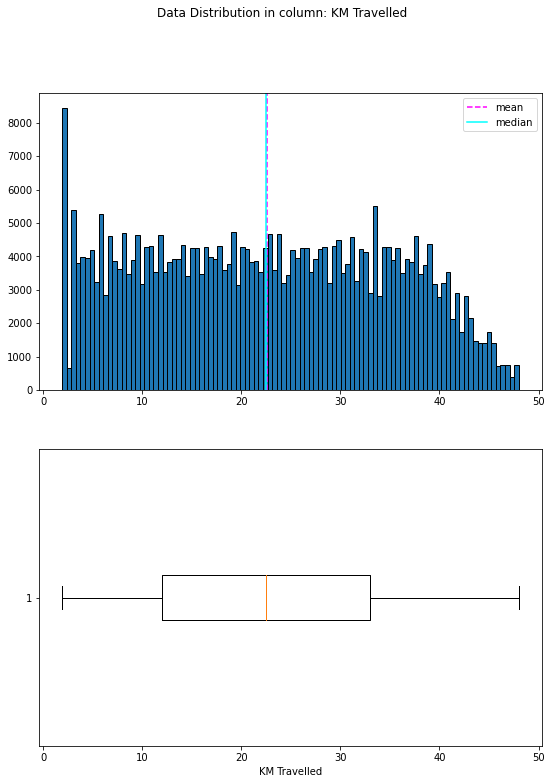

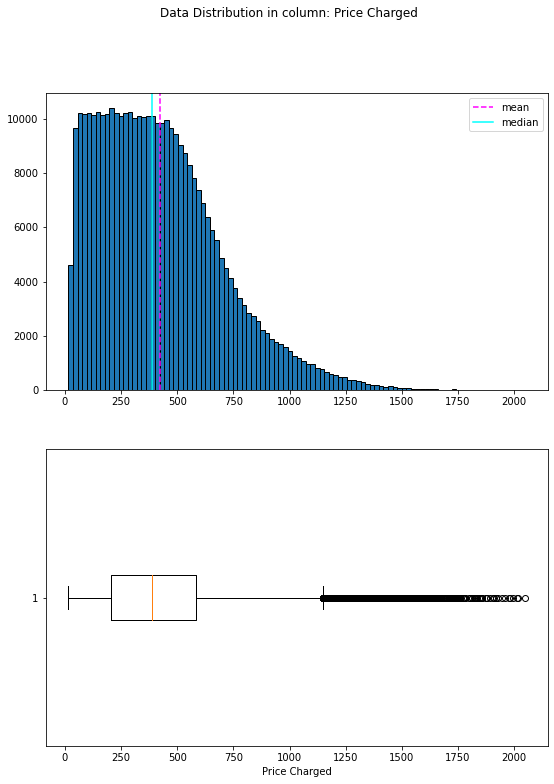

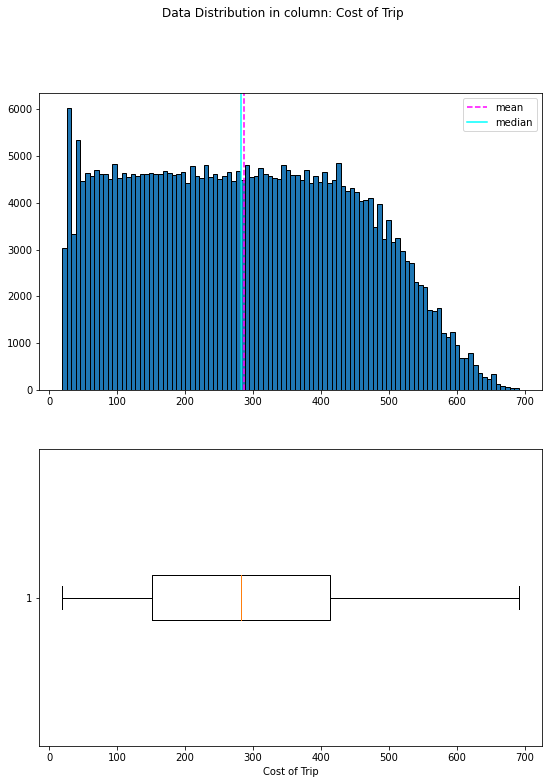

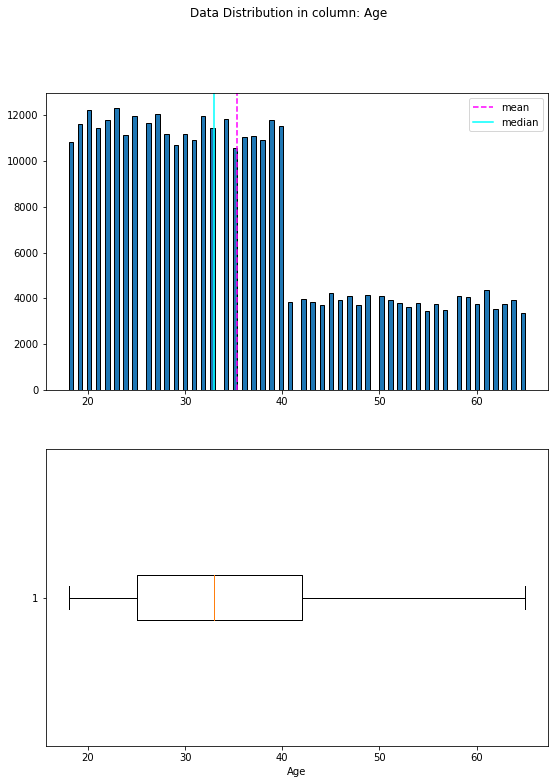

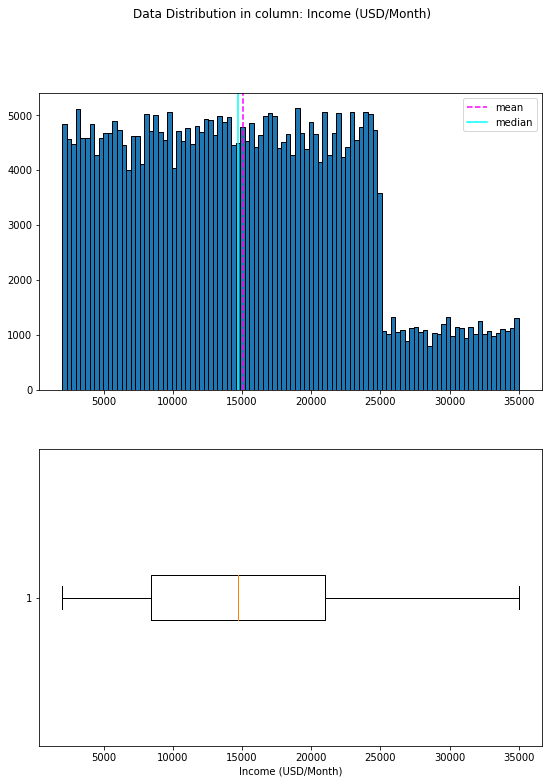

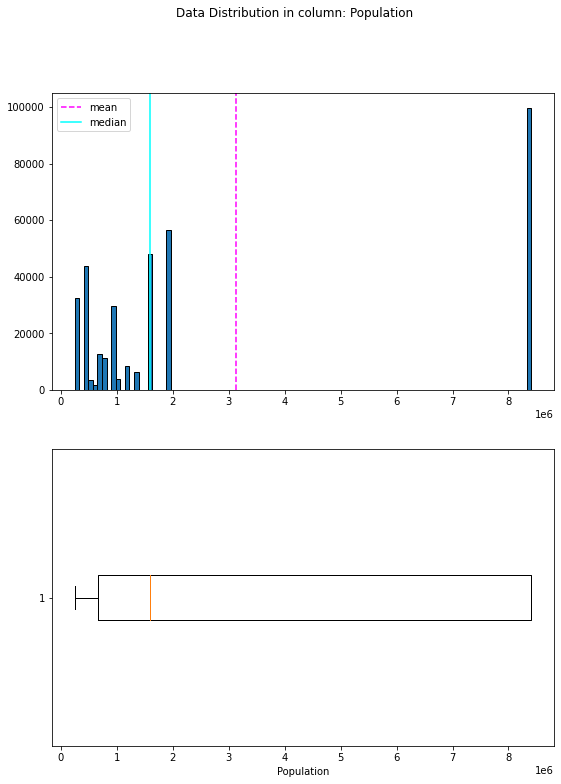

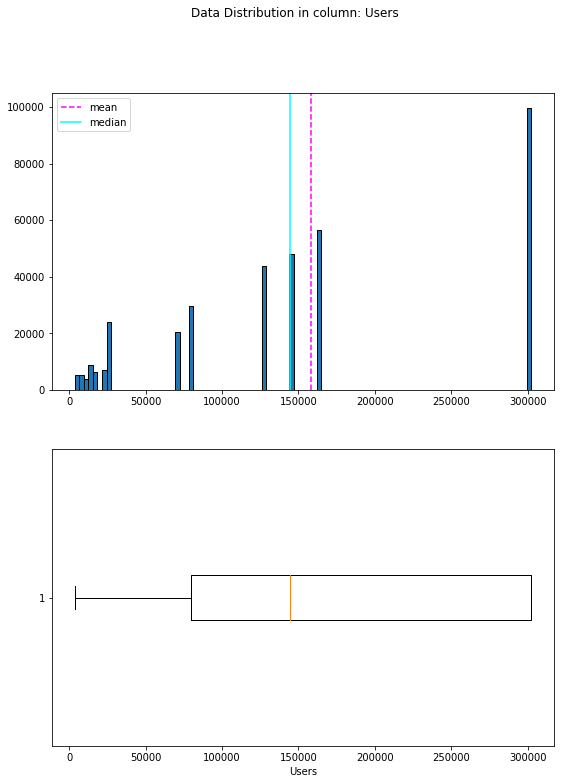

In [33]:
#Plot the histograms boxplots

for col in numeric_features:
    #Create a figure 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (9, 12))
    feature = data[col]
    ax[0].hist(feature, bins = 100, edgecolor = 'black')
    ax[0].axvline(feature.mean(), color = 'magenta', linestyle = 'dashed', label = 'mean')
    ax[0].axvline(feature.median(), color = 'cyan', linestyle = 'solid', label = 'median')
    ax[0].legend()
    
    ax[1].boxplot(feature, vert = False)
    ax[1].set_xlabel(col)
    
    fig.suptitle('Data Distribution in column: ' + col)
plt.show()

These graphs show all numerical variables such as KM Travelled, Price Charged, Cost of Trip, Age, Income (USD/Month), Population and User.

The KM Travelled chat is evenly distributed and symmetric, mean and median in nearly the same point. Without outlier. 

For Price charged graph, right skewed with mean greater than median. With a lot of outlier on the right of the histogram. 

Cost of trip graph, it is slightly right skewed without outlier. 

Age graph, is it right skewed, with mean around 35. Both mean and median are lower than 40. 

<b>Age group of the customers?</b>

In [37]:
bins = [0, 19, 29, 39, 49, 59, 69]
labels = ['Teen', 'Young Adult', 'Middle Age', 'Middle Older Age', 'Senior', 'Old']
data['Age Group'] = pd.cut(data['Age'], bins = bins, labels = labels)
data['Year'] = pd.DatetimeIndex(data['Date of Travel']).year
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Population,Users,Age Group,Year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Male,28,10813,Card,814885,24701,Young Adult,2016
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Male,27,9237,Card,814885,24701,Young Adult,2016
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Male,53,11242,Cash,814885,24701,Senior,2016
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Male,23,23327,Cash,814885,24701,Young Adult,2016
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Male,33,8536,Card,814885,24701,Middle Age,2016
